In [12]:
import json
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

##  Read data 

In [27]:
# read prior

f = open('emimtf2n_FIM_info/PR_quad_543900.json')

data = json.load(f)

#prior_info = data[0]['1']

#print(prior_info)

In [28]:
T_range = [273, 283, 293, 303, 313, 323, 333, 343, 353, 363, 373, 383, 393, 400]
x_range = [0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


In [29]:
A_heatmap = np.zeros((len(T_range), len(x_range)))
D_heatmap = np.zeros((len(T_range), len(x_range)))
E_heatmap = np.zeros((len(T_range), len(x_range)))
ME_heatmap = np.zeros((len(T_range), len(x_range)))


for i in range(len(T_range)):
    for j in range(len(x_range)):
        count = i*len(x_range) + j 
        
        fim = np.asarray(data[0][str(count)])
        
        A_heatmap[i,j] = np.trace(fim)
        D_heatmap[i,j] = np.linalg.det(fim)
        E_heatmap[i,j] = min(np.linalg.eigvals(fim))
        ME_heatmap[i,j] = np.linalg.cond(fim)
        

In [30]:
print(D_heatmap)

[[1.20364632e+61 1.33311098e+61 1.48657324e+61 1.61869414e+61
  1.72310133e+61 1.90130038e+61 2.46326952e+61 3.82465976e+61
  4.82501179e+61]
 [1.18304933e+61 1.26380072e+61 1.35769493e+61 1.42503791e+61
  1.43605448e+61 1.41443203e+61 1.53150886e+61 2.15992587e+61
  2.93194230e+61]
 [1.17287475e+61 1.22528400e+61 1.27835253e+61 1.30415249e+61
  1.30098477e+61 1.36520712e+61 1.84866030e+61 3.41520821e+61
  4.94788319e+61]
 [1.17750407e+61 1.23332983e+61 1.27580767e+61 1.28523620e+61
  1.34839757e+61 1.90036422e+61 4.29106029e+61 1.10690628e+62
  1.70700032e+62]
 [1.19494170e+61 1.27839498e+61 1.32648642e+61 1.33896438e+61
  1.64514544e+61 3.71069259e+61 1.24293275e+62 3.95716512e+62
  6.92871443e+62]
 [1.21785748e+61 1.32357721e+61 1.36051538e+61 1.51038324e+61
  3.13812292e+61 1.19151286e+62 4.90913666e+62 1.93285661e+63
  1.28896039e+66]
 [1.24252606e+61 1.33059414e+61 1.34997402e+61 2.41701563e+61
  1.03706763e+62 4.98633821e+62 2.35058512e+63 2.38161189e+64
  2.85450511e+66]
 [1.29

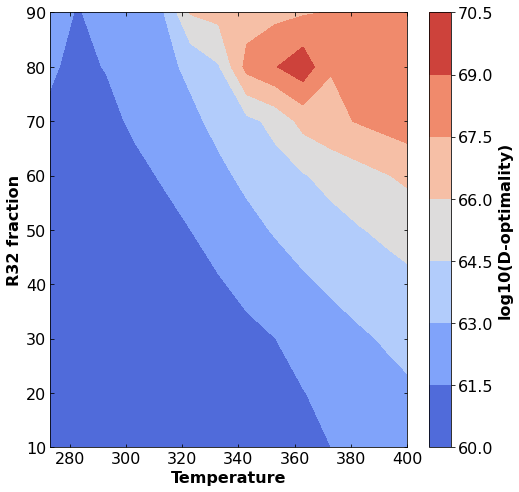

In [42]:
def contour(T_range_label, x_range_label, heatmap_data, bar_label):
    # draw figure, using (6,6) because the plot is small otherwise
    plt.figure(figsize=(8,8))

    # plot heatmap
    #   cmap defines the overall color within the heatmap 
    #   levels: determines the number and positions of the contour lines / regions.
    cs = plt.contourf(T_range_label, x_range_label, heatmap_data.T,cmap=cm.coolwarm)

    # plot color bar
    cbar = plt.colorbar(cs)

    # plot title in color bar
    cbar.ax.set_ylabel(bar_label, fontsize=16, fontweight='bold')

    # set font size in color bar
    cbar.ax.tick_params(labelsize=16)

    # plot equipotential line
    #  [::10] means sampling 1 in every 10 samples
    #  colors define the color want to use, 'k' for black
    #  alpha is blending value, between 0 (transparent) and 1 (opaque).
    #  linestyle defines the linestyle.
    #  linewidth defines the width of line
    cs2 = plt.contour(cs, levels=cs.levels[::10], colors='k', alpha=0.7, linestyles='dashed', linewidths=3)

    # plot the heatmap label
    #  %2.2f means keep to 2 digit
    #  fontsize defines the size of the text in figure
    plt.clabel(cs2, fmt='%2.2f', colors='k', fontsize=16)

    # define tick size
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tick_params(direction="in",top=True, right=True)

    # set squared figure
    #plt.axis('square')

    # plot titile and x,y label
    plt.xlabel(r'Temperature', fontsize=16, fontweight='bold')
    plt.ylabel(r'R32 fraction', fontsize=16, fontweight='bold')
    plt.show()

    # save figure (important for publications)
    # plt.savefig('heatmap.png',bbox_inches='tight')
    
    
T_range_lab = T_range    
x_range_lab = [10,20,30,40,50,60,70,80,90]
    
contour(T_range_lab, x_range_lab, np.log10(A_heatmap), 'log10(A-optimality)')